In [3]:
import matplotlib.pyplot as plt
import cv2
from paddleocr import PaddleOCR
import os
import re

In [5]:
def plot_and_process_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(2,2))
    enh = clahe.apply(img)
    blur = cv2.GaussianBlur(enh, (0,0), 3)
    sharp = cv2.addWeighted(enh, 1.5, blur, -0.5, 0)
    lap = cv2.Laplacian(sharp, cv2.CV_8U, ksize=3)
    final = cv2.addWeighted(sharp, 1, lap, -0.4, 0)
    plt.figure(figsize=(20, 10))
    plt.subplot(141)
    plt.imshow(img)
    plt.title("Img GrayScale")
    plt.subplot(142)
    plt.imshow(enh)
    plt.title("Apply CLAHE")
    plt.subplot(143)
    plt.imshow(sharp)
    plt.title("Apply GaussianBlur")
    plt.subplot(144)
    plt.imshow(final)
    plt.title("Apply Laplacian")
    plt.show()    

def process_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(2,2))
    enh = clahe.apply(img)
    blur = cv2.GaussianBlur(enh, (0,0), 3)
    sharp = cv2.addWeighted(enh, 1.5, blur, -0.5, 0)
    lap = cv2.Laplacian(sharp, cv2.CV_8U, ksize=3)
    final = cv2.addWeighted(sharp, 1, lap, -0.4, 0)
    return final

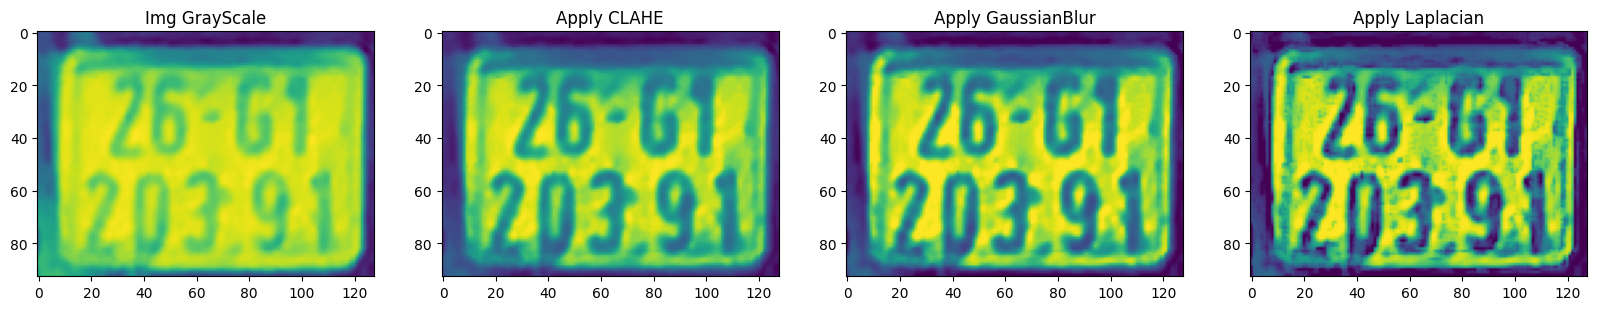

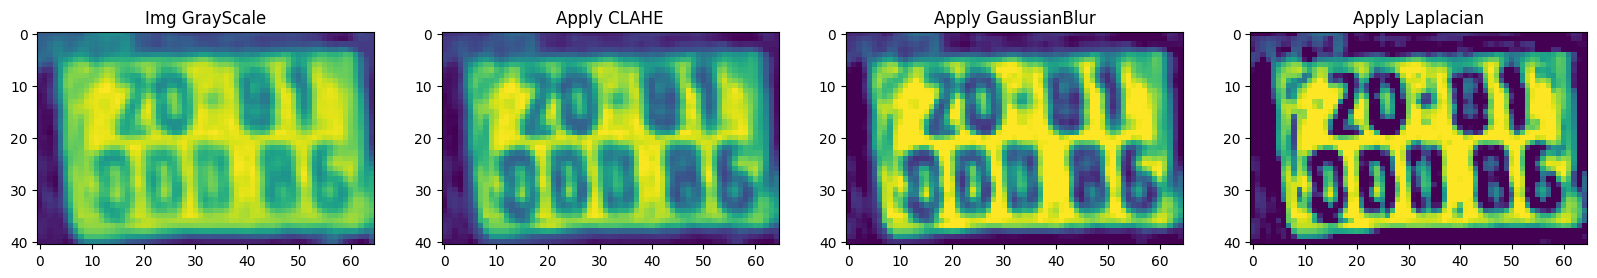

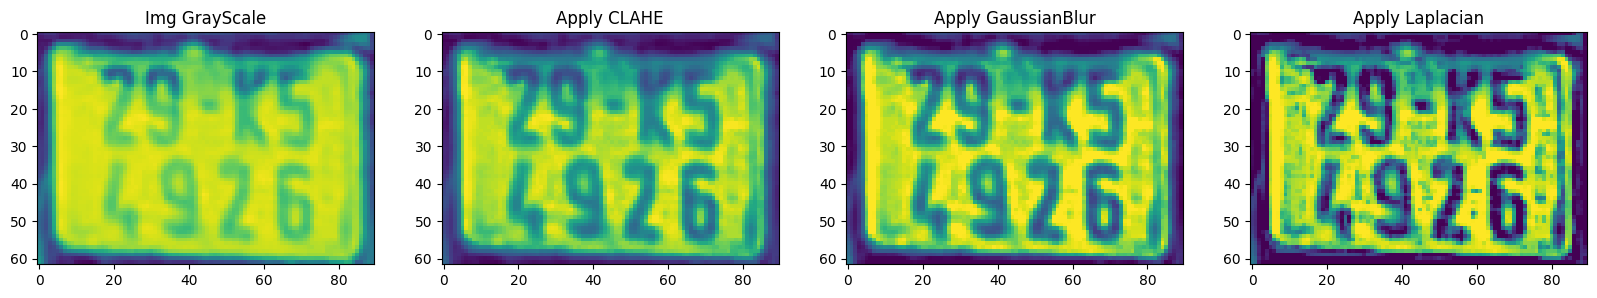

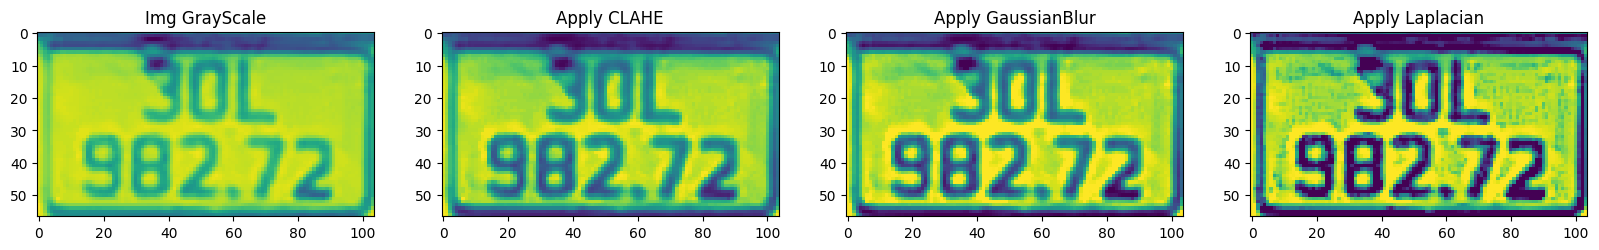

In [6]:
for img_name in os.listdir('data')[:4]:
    img_path = f"data/{img_name}"
    img = cv2.imread(img_path)
    plot_and_process_img(img)

In [ ]:
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/namtt/.paddlex/official_models/PP-OCRv5_server_det`.


Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/namtt/.paddlex/official_models/PP-OCRv5_server_rec`.


In [19]:
CONFUSIONS_TO_NUMBER = {
    'B': '8',
    'G': '6',
    'Z': '2',
    'S': '5',
    'O': '0',
    'I': '1',
    'D': '0',
    'A': '4',
    'C': '0',
    'L': '4'
}

CONFUSIONS_TO_LETTER = {
    '8': 'B',
    '6': 'G',
    '9': 'B',
    '2': 'Z',
    '5': 'S',
    '0': 'B',
    '1': 'I',
}

def correct_char(char, must_be_letter=False):
    if must_be_letter:
        return CONFUSIONS_TO_LETTER.get(char, char)
    else:
        return CONFUSIONS_TO_NUMBER.get(char, char)

def post_process_license_plate(raw_text):
    clean_text = re.sub(r'[^A-Z0-9]', '', str(raw_text).upper())
    if len(clean_text) <= 7:
        return "OCR ERROR" 

    corrected_chars = []
    
    template = "NNLNNNNNNNN"

    for i, char in enumerate(clean_text):
        must_be_letter = (template[i] == 'L')
        corrected_chars.append(correct_char(char, must_be_letter))

    return "".join(corrected_chars)

def get_OCR(img):
    img = process_img(img)
    img = cv2.merge([img, img, img])
    result = ocr.predict(img)[0]
    label = ""
    if result["rec_texts"] is not None:
        for text in result["rec_texts"]:
            label += text
    label = post_process_license_plate(label)
    return label

def plot_result(img_path):
    img = cv2.imread(img_path)
    label = get_OCR(img)
    plt.imshow(img)
    plt.title(label)
    plt.show()

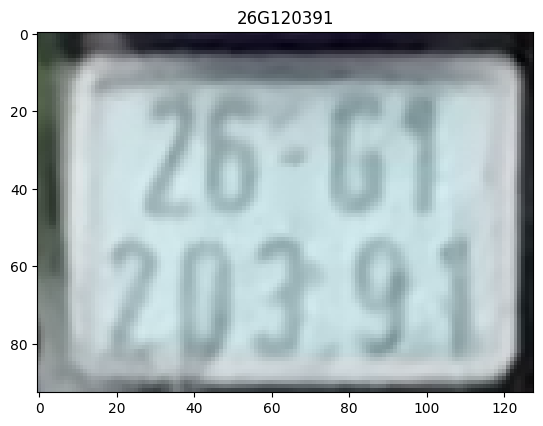

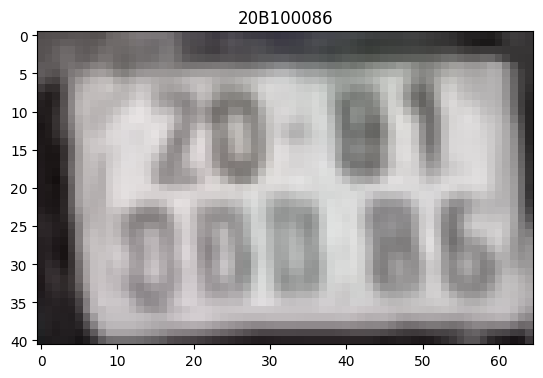

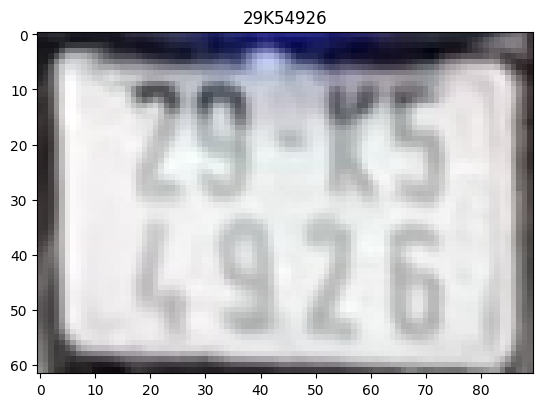

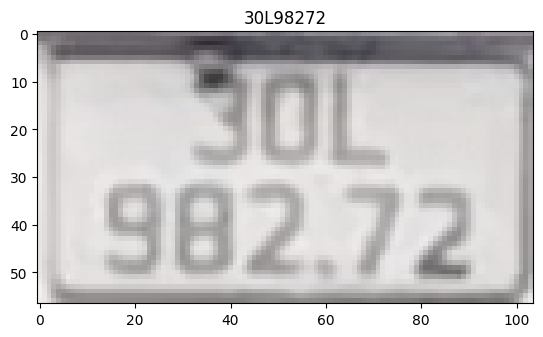

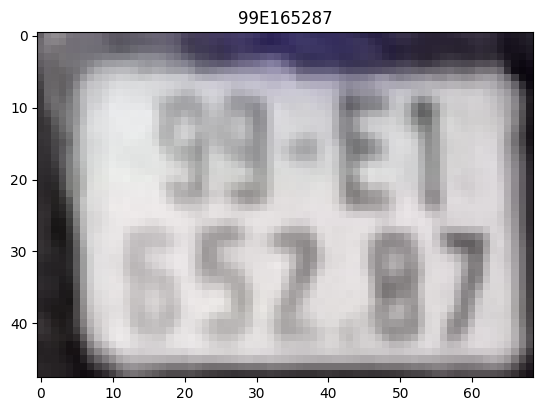

In [20]:
data_path = "data"
for img_name in os.listdir(data_path)[:5]:
    img_path = f"{data_path}/{img_name}"
    plot_result(img_path)